Yan Liang's homework

import the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *
from sklearn.metrics import *
from sklearn.model_selection import *

load the data

In [2]:
df = pd.read_csv ('day.csv')

print(df.describe())
print (df.head(5))

          instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.5448

From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable? (3 marks) 

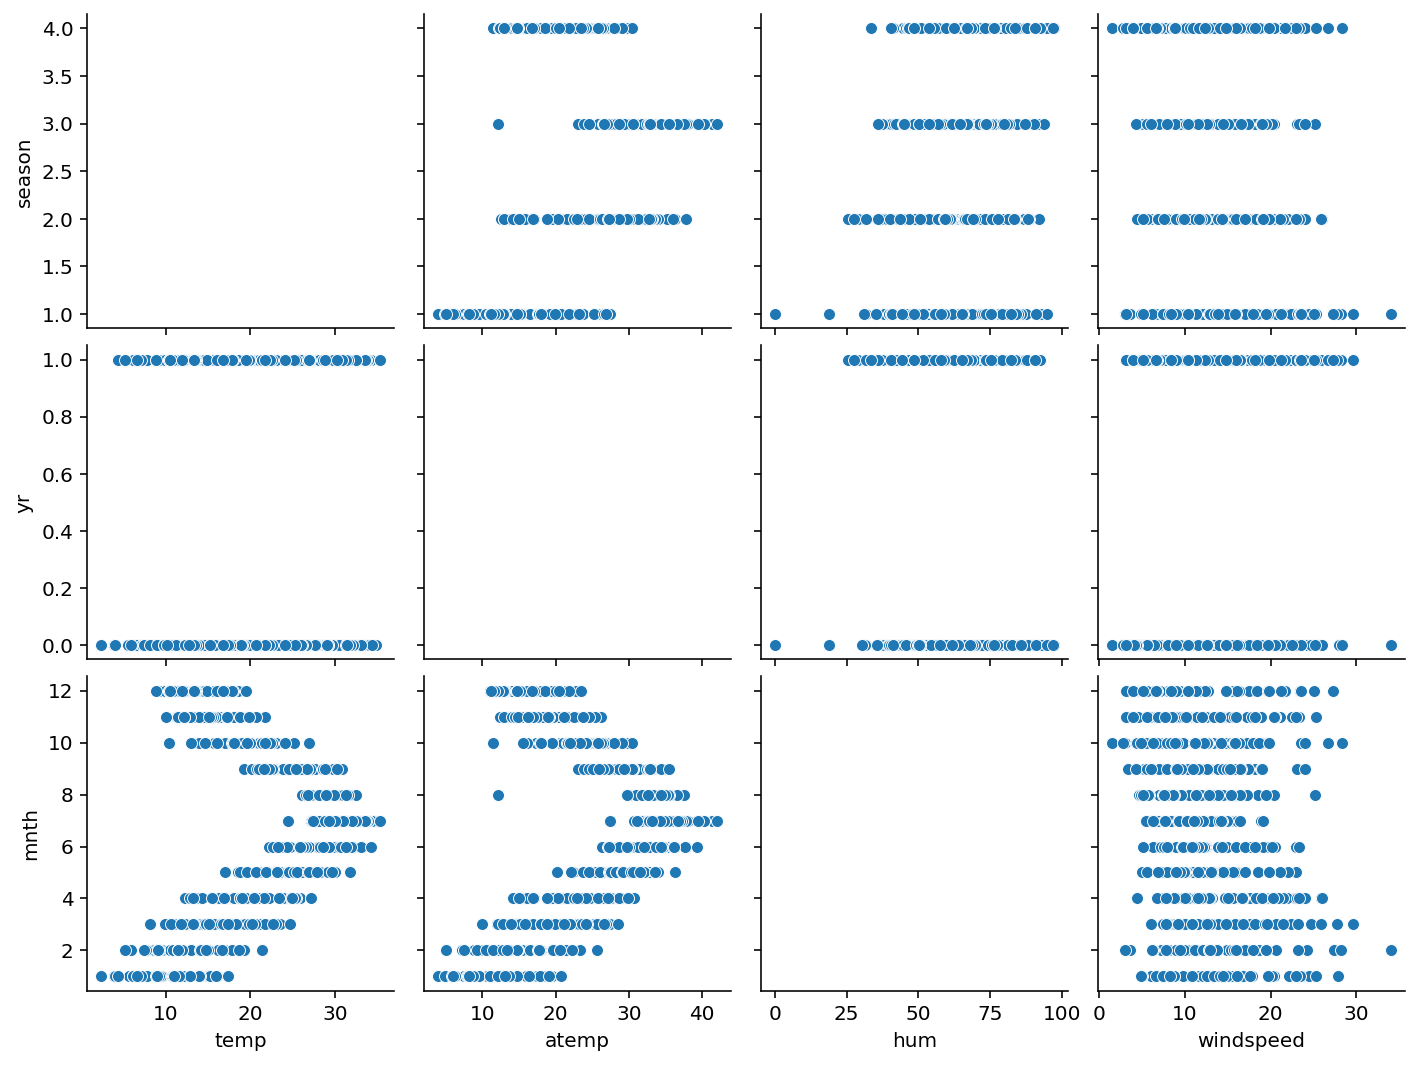

In [3]:
import seaborn as sns

sns.pairplot(
    df,
    x_vars=["temp", "atemp", "hum", "windspeed"],
    y_vars=["season", "yr", "mnth"],
)

Looking at the pair-plot among the numerical variables, which one has the highest correlation with the target variable? (1 mark) 

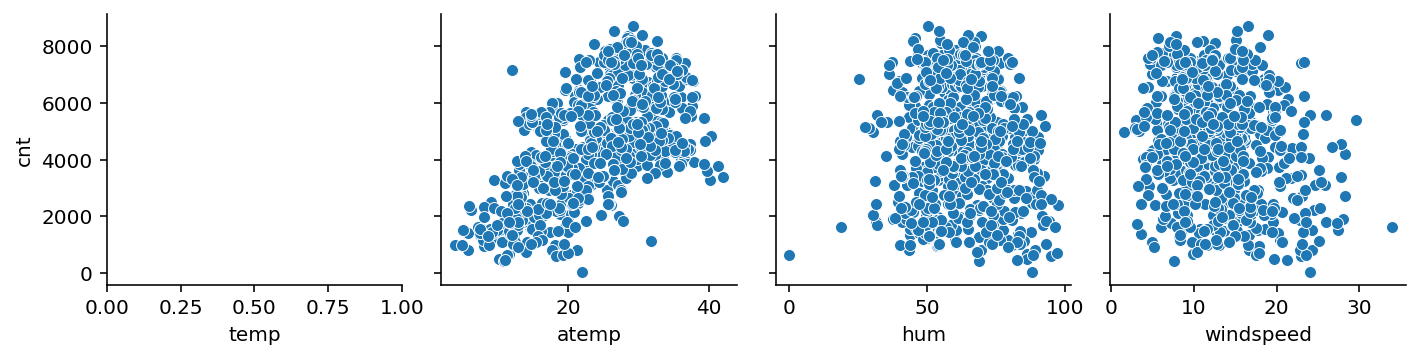

In [4]:
sns.pairplot(
    df,
    x_vars=["temp", "atemp", "hum", "windspeed"],
    y_vars=["cnt"],
)

conver the categorial varialbes to vectors

In [5]:
from sklearn.preprocessing import OneHotEncoder

def categorial_varable_to_vector_list(column_name):
    seasons = [[x] for x in df[column_name].unique()]
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(seasons)
    seasons_variable = [list(x) for x in list(enc.transform([[x] for x in df['season'].tolist()]).toarray())]
    return seasons_variable


categoarial_columns = ['season','yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


x_all = []

for c in categoarial_columns:
    x = categorial_varable_to_vector_list(c)
    x = np.array(x).T
    x_all.append(x)

x_all = tuple(x_all)
x_categorail = np.concatenate(x_all).T

print(x_categorail.shape)

(730, 32)


convert the rest columns to vector

In [6]:
numemrical_columns = ['temp', 'atemp', 'hum', 'windspeed'] #, 'casual', 'registered'

x = [df[n].tolist() for n in numemrical_columns]

x_numerical = np.array(x).T

print(x_numerical.shape)

(730, 4)


scaling the numerical variables by z-score for the 'temp', 'atemp', 'hum', 'windspeed'

In [7]:
from scipy import stats

x_numerical = stats.zscore(x_numerical, axis=0, ddof=1)

print(np.sum(x_numerical, axis=0))

[-1.84741111e-13  4.26325641e-14 -6.82121026e-13  5.68434189e-14]


combine the numberical and categorial varaibles

In [8]:
x = np.concatenate((x_categorail, x_numerical), axis=1)

print(x)

print(x.shape)

[[ 1.          0.          0.         ... -0.68035119  1.25148472
  -0.38756724]
 [ 1.          0.          0.         ... -0.74099921  0.48066601
   0.74838579]
 [ 1.          0.          0.         ... -1.74914519 -1.33715581
   0.74541996]
 ...
 [ 1.          0.          0.         ... -1.42403477  0.87982067
  -0.85259709]
 [ 1.          0.          0.         ... -1.48967646 -1.01364598
   2.06644102]
 [ 1.          0.          0.         ... -1.54006106 -0.35224889
  -0.45977885]]
(730, 36)


prepare the output list

In [9]:
y = np.array(df['cnt'].tolist())

print(y.shape)

(730,)


split the training and test set

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=42)

print(x_train.shape, y_train.shape)

print(x_test.shape, y_test.shape)

(657, 36) (657,)
(73, 36) (73,)


train the model

In [11]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 5.53314732e+16  6.63534505e+15  7.19528929e+15  2.17879953e+16
 -3.96703071e+15 -3.05721918e+14 -1.56455540e+15  1.28968426e+16
  1.27101946e+16  1.17689388e+16  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.03383072e+15
  0.00000000e+00 -2.03383072e+15  1.28968426e+16  1.27101946e+16
  1.17689388e+16  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.03383072e+15 -2.03383072e+15  1.28968426e+16  1.27101946e+16
 -6.17843386e+02  1.79800000e+03 -5.23500000e+02 -2.85500000e+02]


find the largest absolute value coefficient

In [20]:
print(np.argsort(-np.abs(regr.coef_))[0:4])

print(x_categorail.shape, x_numerical.shape)

[ 0  3 22 30]
(730, 32) (730, 4)


test the model

In [12]:
y_test_predict = regr.predict(x_test)

print('Mean squared error: %.2f'% mean_squared_error(y_test, y_test_predict))

print('Coefficient of determination: %.2f'% r2_score(y_test, y_test_predict))

Mean squared error: 2174960.75
Coefficient of determination: 0.31
